In [51]:
### Author : Prasad Meesala
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, model_selection, preprocessing

In [52]:
# Collecting the data

df = pd.read_csv(r"C:\Users\meesa\Desktop\VSC-ML\Datasets\bmi.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [53]:
X = df.drop(['Index', 'Gender'], axis = 1)
X.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


In [54]:
# Scaling the features

scaler = preprocessing.MinMaxScaler()

scaler.fit(X[['Height']])
X['Height'] = scaler.transform(X[['Height']])

scaler.fit(X[['Weight']])
X['Weight'] = scaler.transform(X[['Weight']])

X.head()

,Height,Weight
0,0.576271,0.418182
1,0.830508,0.336364
2,0.762712,0.545455
3,0.932203,0.490909
4,0.152542,0.100000


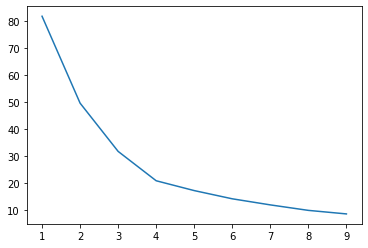

In [55]:
# Determining a best value of k by drawing elbow graph

sse = []

for k in range(1, 10):
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse)  # Elbow at k = 4
plt.show()

In [56]:
# Clustering the data by taking k = 4

kmeans = cluster.KMeans(n_clusters = 4)

y_predicted = kmeans.fit_predict(X)
print(y_predicted)

df['cluster'] = y_predicted

[0 0 2 2 3 2 3 1 0 3 0 3 0 3 0 3 1 1 1 2 1 1 3 2 0 3 0 0 1 2 1 0 0 1 1 2 2
 3 1 0 2 3 3 1 2 0 2 2 3 1 1 0 1 2 2 0 0 2 3 3 0 1 0 0 2 2 0 3 3 2 3 2 3 0
 0 2 3 3 2 0 3 1 2 2 1 0 2 1 3 2 2 0 2 0 2 1 3 1 0 0 2 3 1 2 2 2 1 1 2 3 3
 1 2 0 0 3 3 3 3 2 3 2 2 2 1 3 2 3 2 3 1 0 1 1 1 2 2 2 1 1 0 3 2 1 3 2 2 1
 0 1 0 3 3 1 1 0 0 1 0 2 0 0 0 2 2 0 2 3 3 0 2 2 1 2 2 2 0 0 1 0 3 2 3 0 2
 3 1 0 1 3 3 3 3 1 3 3 3 2 1 2 0 0 3 2 1 3 3 2 0 3 3 1 1 2 0 2 1 3 1 1 0 2
 3 2 0 1 3 2 2 2 2 3 0 0 3 0 2 1 0 1 0 3 0 2 0 1 0 1 0 3 3 1 1 1 2 3 2 1 1
 2 3 1 1 3 3 3 2 1 1 3 1 3 2 3 0 0 2 0 0 0 0 1 3 3 2 2 3 2 3 3 3 2 3 3 1 1
 3 3 0 3 2 2 0 2 1 2 2 3 0 1 1 2 2 0 0 1 0 1 0 1 2 2 3 2 3 3 0 3 3 0 1 3 3
 0 3 3 1 1 2 1 3 2 3 0 2 2 0 3 2 3 0 0 3 2 0 0 2 2 0 2 0 3 1 2 2 3 0 2 1 3
 3 1 0 3 0 1 3 2 3 0 1 0 2 1 2 0 1 3 3 3 3 0 0 0 1 3 0 1 3 1 2 2 0 2 2 1 0
 1 1 1 0 0 2 1 3 3 1 3 1 0 0 1 2 2 0 0 2 2 3 3 0 1 3 2 3 1 1 2 0 1 2 0 1 1
 2 1 3 2 3 1 1 0 1 0 0 0 2 0 3 2 2 1 0 1 0 1 0 1 1 2 1 1 0 2 3 2 1 3 3 3 1
 2 3 3 2 2 1 0 2 2 3 1 0 

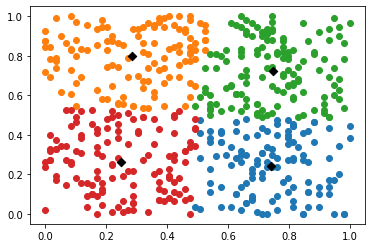

In [57]:
# Visualizing the clusters

df['Height'] = X['Height'].copy()
df['Weight'] = X['Weight'].copy()

df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]

centroids = kmeans.cluster_centers_

plt.scatter(df0['Height'], df0['Weight'])
plt.scatter(df1['Height'], df1['Weight'])
plt.scatter(df2['Height'], df2['Weight'])
plt.scatter(df3['Height'], df3['Weight'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'D', color = "black")

plt.show()